In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Первый датасет

In [2]:
path = {'filepath_or_buffer': './companies.csv'}

def read_n_agg(p):
    df = pd.read_csv(**p, delimiter=';')
    df = df.groupby('company', as_index=True).agg({'income': 'mean'})
    return df

read_n_agg(path)


,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


Второй датасет


In [3]:
taxi = pd.read_csv('./taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
(taxi.source.value_counts()/len(taxi)) * 100


source
iPhone     42.148760
web        33.018909
Android    21.240968
iPad        2.470685
Wap         0.588464
Name: count, dtype: float64

In [19]:
taxi_counts = (taxi['source']).value_counts().reset_index().rename(columns={'source': 'cnt'})
taxi_counts


,cnt,count
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


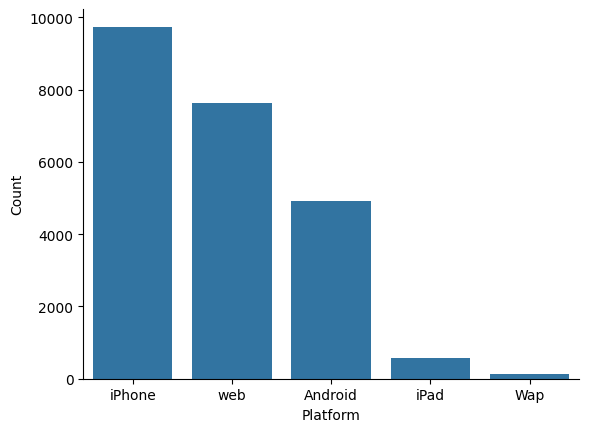

In [20]:
ax = sns.barplot(x='cnt', y='count', data=taxi_counts)
ax.set(xlabel='Platform', ylabel='Count') # подписываем оси 
sns.despine() # убрать часть рамки графика 


<Axes: xlabel='icon', ylabel='count'>

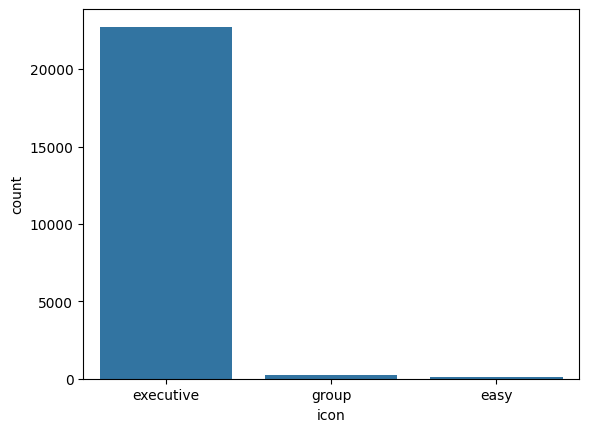

In [ ]:
sns.countplot(x = taxi['icon'])

<Axes: xlabel='source', ylabel='count'>

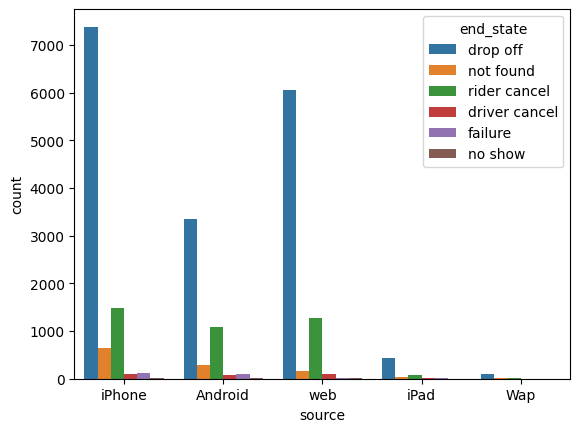

In [ ]:
sns.countplot(x = taxi['source'], hue=taxi['end_state'])

In [ ]:
taxi.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [ ]:
driver_score_counts = (taxi['driver_score'].value_counts() / taxi['driver_score'].value_counts().sum()).mul(100).round(2).reset_index().rename(columns={'count': 'percentage'})
driver_score_counts

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


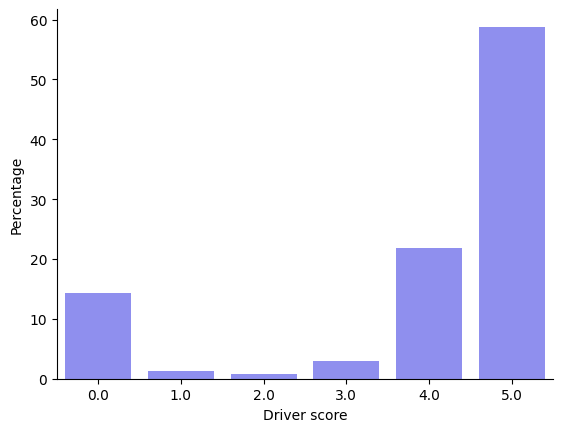

In [ ]:
ax = sns.barplot(x=driver_score_counts['driver_score'], y=driver_score_counts['percentage'], data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [ ]:
rider_score_counts = (taxi['rider_score'].value_counts() / taxi['rider_score'].value_counts().sum()).mul(100).round(2).reset_index().rename(columns={'count': 'percentage'})
rider_score_counts

,rider_score,percentage
0,5.0,87.10
1,4.0,8.83
2,0.0,2.29
3,3.0,1.38
4,1.0,0.21
5,2.0,0.19


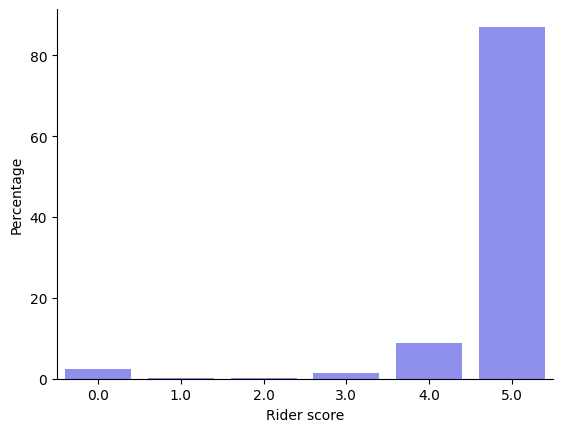

In [ ]:
ax = sns.barplot(x=rider_score_counts['rider_score'], y=rider_score_counts['percentage'], data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()